<a href="https://colab.research.google.com/github/valesierrai/Analisis-Supervisado-para-el-AD/blob/main/Ejercicio_de_Regresi%C3%B3n_Lineal_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio

1. Cargue el archivo 'california_housing_train.csv'
2. Se va a implementar un modelo de aprendizaje de máquina de regresión lineal para predecir la variable 'median_house_value'. Genere las estadísticas descriptivas, el histograma, y el diagrama de cajas y bigotes de esta variable y analice esta información.
3. Elimine las muestras del dataset en las cuales esta variable sea un outlier, de acuerdo con el boxplot (por cuartiles). Vuelva a generar las estadísticas descriptivas de esta variable y a graficar el histograma y el boxplot ya sin datos átipicos
4. Vamos a usar como variable predictora 'median_income'. Haga un gráfico de dispersión de 'median_house_value' versus 'median_income' y analícelo. ¿Qué concluye?
5. Haga la matriz de características $X$ y la matriz objetivo $y$
6. Cree un modelo de regresión lineal con parámetro 'fit_intercept = True'
7. Entreneme el modelo. Muestre los parámetros del modelo. Calcule el 'score' del modelo. ¿Qué tan bueno es el modelo?
8. En un gráfico de dispersión muestre las predicciones del modelo junto con los valores reales. ¿Qué puede observar?
9. Ahora vamos a ver qué tan bueno es el modelo con datos nuevos. Cargue el archivo 'california_housing_test.csv'. Genere las matrices de características y objetivo respectivamente y calcule el 'score'. ¿Qué puede observar?
10. Ahora haga predicciones sobre los datos nuevos y en un gráfico de dispersión muestre las predicciones junto con los valores reales de $y$. ¿Qué concluye?  

#Base de Datos 'california_housing_train.csv'

In [ ]:
#Se cargan las Librerias
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

1. Cargue el archivo 'california_housing_train.csv'


In [ ]:
#Cargamos los datos
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje Supervisado/california_housing_train.csv')
df.head()

Mounted at /content/drive


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


2. Se va a implementar un modelo de aprendizaje de máquina de regresión lineal para predecir la variable 'median_house_value'. Genere las estadísticas descriptivas, el histograma, y el diagrama de cajas y bigotes de esta variable y analice esta información.


In [ ]:
#Estadísticas Descriptivas
df['median_house_value'].describe()

,median_house_value
count,17000.000000
mean,207300.912353
std,115983.764387
min,14999.000000
25%,119400.000000
50%,180400.000000
75%,265000.000000
max,500001.000000


<Axes: >

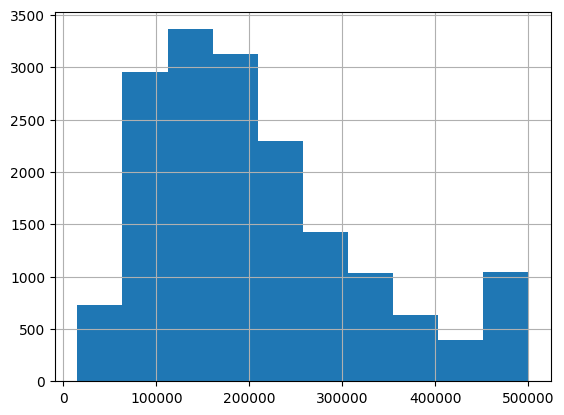

In [ ]:
#Histograma
df['median_house_value'].hist()

<Axes: >

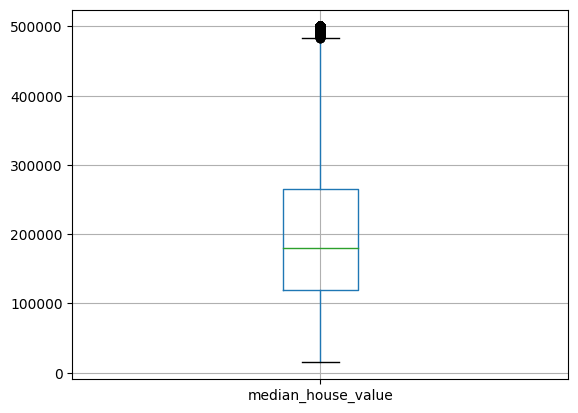

In [ ]:
#Diagrama de Cajas y Bigotes
df.boxplot(column = 'median_house_value')

*Posiblemente los datos en negro sean datos atípicos (500000)

3. Elimine las muestras del dataset en las cuales esta variable sea un outlier, de acuerdo con el boxplot (por cuartiles). Vuelva a generar las estadísticas descriptivas de esta variable y a graficar el histograma y el boxplot ya sin datos átipicos

In [ ]:
#Cuartil 1
Q1 = df['median_house_value'].quantile(0.25)
#Cuartil 3
Q3 = df['median_house_value'].quantile(0.75)
#Rango Intercuartil
IQR = Q3 - Q1

#Límite Superior
upper_limit = 1.5 * IQR +Q3
#Límite Inferior
lower_limit = Q1 - 1.5 * IQR

#Filtramos todo lo que esté por encima del límite superior, y todo lo que esté debajo del límite inferior

df_sin_outliers = df[(df['median_house_value'] < upper_limit) & (df['median_house_value'] > lower_limit)]

In [ ]:
#Estadísticas Descriptivas
df_sin_outliers['median_house_value'].describe()

,median_house_value
count,16105.000000
mean,191068.320149
std,95886.412230
min,14999.000000
25%,116200.000000
50%,173400.000000
75%,246800.000000
max,483300.000000


<Axes: >

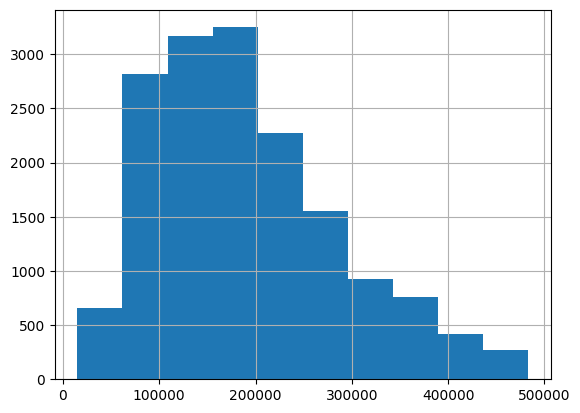

In [ ]:
#Histograma
df_sin_outliers['median_house_value'].hist()

<Axes: >

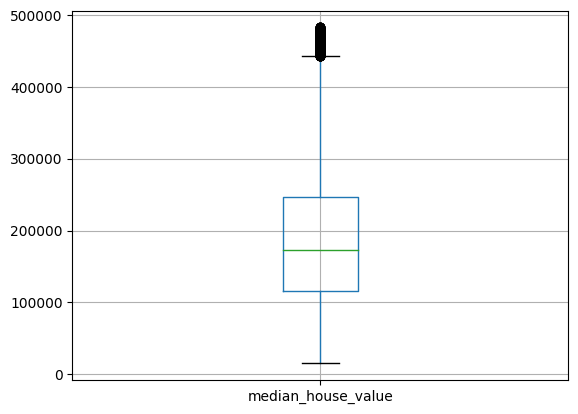

In [ ]:
#Diagrama de Cajas y Bigotes
df_sin_outliers.boxplot(column = 'median_house_value')

4. Vamos a usar como variable predictora 'median_income'. Haga un gráfico de dispersión de 'median_house_value' versus 'median_income' y analícelo. ¿Qué concluye?

In [ ]:
px.scatter(df_sin_outliers,x="median_income",y="median_house_value")

Según el gráfico nos damos cuenta que existe una relación directa entre el ingreso medio y el valor de las casas, pues a menor ingreso medio, menor es el valor de la casa y a mayor ingreso medio el valor de la casa aumenta también.

5. Haga la matrix de características $X$ y la matriz objetivo $y$

In [ ]:
#Construimos la matriz característica de X
X = df_sin_outliers[['median_income']].copy()
#Visualizamos
X.shape

(16105, 1)

In [ ]:
#Construimos la matriz objetivo
y= df_sin_outliers['median_house_value'].copy()
#Visualizamos
y.shape

(16105,)

6. Cree un modelo de regresión lineal con parámetro 'fit_intercept= True'

In [ ]:
from sklearn.linear_model import LinearRegression
#Instanciamos el modelo
model = LinearRegression(fit_intercept=True)

In [ ]:
#Revisamos las dimensiones de x
X.shape

(16105, 1)

In [ ]:
#Revisamos las dimensiones de y
y.shape

(16105,)

7. Entreneme el modelo. Muestre los parámetros del modelo. Calcule el 'score' del modelo. ¿Qué tan bueno es el modelo?

In [ ]:
#Entrenamos el modelo
model.fit(X,y)

LinearRegression()

In [ ]:
#Parámetros del modelo
model.coef_
model.intercept_

45183.64568543548

In [ ]:
#Miramos el score para saber el rendimiento del modelo
model.score(X,y)

0.4199316174176958

Según el score podemos decir que si bien se encuentra un poco por debajo de la mitad de 1, el modelo no es tan malo. Es decir, tenemos un modelo que si bien no es el mejor de todos, no termina siendo malo.

In [ ]:
#Generamos los datos de test (datos desconocidos)
xfit= np.linspace(-1,11) #Crea un vector de datos linealmente espaciados

#Ajustamos la dimensión para que se ajuste a la matriz de características
Xfit= xfit[:,np.newaxis]

#Hacemos la predicción de los datos nuevos
yfit= model.predict(Xfit)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



8. En un gráfico de dispersión muestre las predicciones del modelo junto con los valores reales. ¿Qué puede observar?


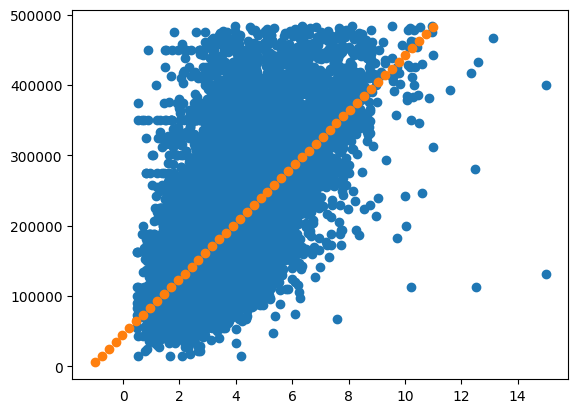

In [ ]:
#Primero gráficamos los datos sin procesar y luego el ajuste
plt.scatter(X,y)
plt.scatter(xfit,yfit)
plt.show()

#Yo le enseñe con los puntos azules y los valide con los naranjas

Estaría bien decir que el modelo validó bien los datos naranjas con base a los azules, puesto que la línea naranja muestra lo que logramos apreciar antes cuando analizamos el diagrama de dispersión. A pedar, de que los datos están muy dispersos.

#Base de datos 'california_housing_test.csv'

9. Ahora vamos a ver qué tan bueno es el modelo con datos nuevos. Cargue el archivo 'california_housing_test.csv'. Genere las matrices de características y objetivo respectivamente y calcule el 'score'. ¿Qué puede observar?


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje Supervisado/california_housing_test.csv')
df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
#Estadísticas Descriptivas
df2['median_house_value'].describe()

,median_house_value
count,3000.00000
mean,205846.27500
std,113119.68747
min,22500.00000
25%,121200.00000
50%,177650.00000
75%,263975.00000
max,500001.00000


<Axes: >

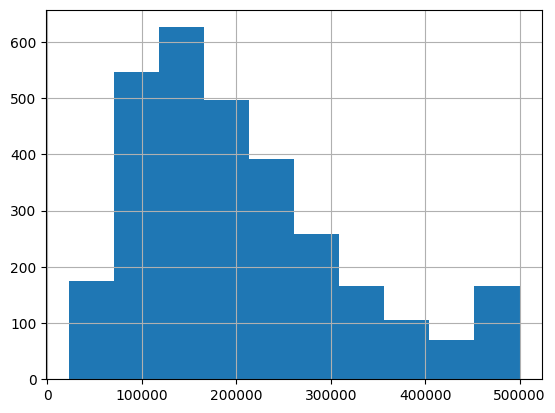

In [ ]:
#Histograma
df2['median_house_value'].hist()

<Axes: >

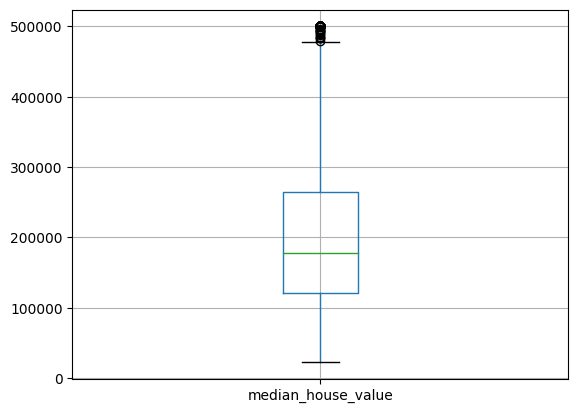

In [ ]:
#Diagrama de Cajas y Bigotes
df2.boxplot(column = 'median_house_value')

In [ ]:
#Cuartil 1
Q1_2 = df2['median_house_value'].quantile(0.25)
#Cuartil 3
Q3_2 = df2['median_house_value'].quantile(0.75)
#Rango Intercuartil
IQR2 = Q3_2 - Q1_2

#Límite Superior
upper_limit = 1.5 * IQR2 + Q3_2
#Límite Inferior
lower_limit = Q1_2 - 1.5 * IQR2

#Filtramos todo lo que esté por encima del límite superior, y todo lo que esté debajo del límite inferior

df2_sin_outliers = df2[(df2['median_house_value'] < upper_limit) & (df2['median_house_value'] > lower_limit)]

In [ ]:
#Estadísticas Descriptivas
df2_sin_outliers['median_house_value'].describe()

,median_house_value
count,2859.000000
mean,191384.365163
std,94738.076352
min,22500.000000
25%,117000.000000
50%,172700.000000
75%,247550.000000
max,477100.000000


<Axes: >

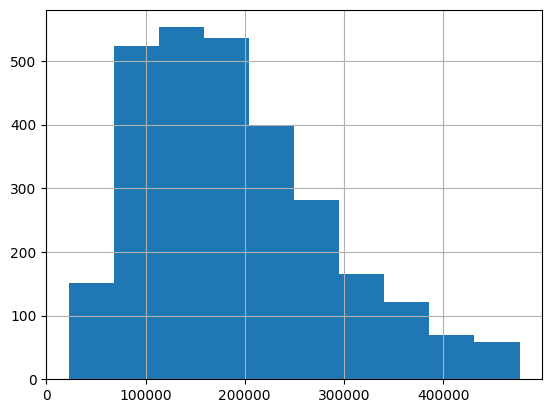

In [ ]:
#Histograma
df2_sin_outliers['median_house_value'].hist()

<Axes: >

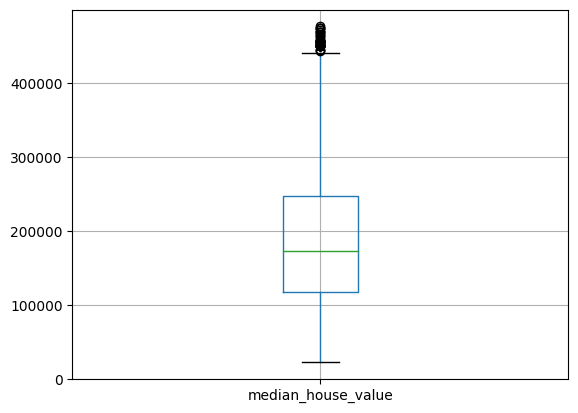

In [ ]:
#Diagrama de Cajas y Bigotes
df2_sin_outliers.boxplot(column = 'median_house_value')

Construimos la Matriz Característica y la Matriz Objetivo

In [ ]:
#Construimos la Matriz característica de X2
X2 = df2_sin_outliers[['median_income']].copy()
#Visualizamos
X2.shape

(2859, 1)

In [ ]:
#Contruimos la Matriz Objetivo de y2
y2 = df2_sin_outliers['median_house_value'].copy()
#Visualizamos
y2.shape

(2859,)

Creamos el Modelo

In [ ]:
from sklearn.linear_model import LinearRegression
#Instanciamos el modelo
model2 = LinearRegression(fit_intercept=True)

In [ ]:
#Revisamos las dimensiones de X2
X2.shape

(2859, 1)

In [ ]:
#Revisamos las dimensiones de y2
y2.shape

(2859,)

In [ ]:
#Entrenamos el Modelo
model2.fit(X2,y2)

LinearRegression()

In [ ]:
#Parámetros del Modelo
model2.coef_
model2.intercept_

49765.73337396255

In [ ]:
#Miramos el score para saber el rendimiento del modelo
model.score(X2,y2)

0.40471733177904956

Aquí, al igual que el modelo anterior, el score tiende a ser malo.

10. Ahora haga predicciones sobre los datos nuevos y en un gráfico de dispersión muestre las predicciones junto con los valores reales de $y$. ¿Qué concluye?  

In [ ]:
#Generamos los datos de test (datos desconocidos)
x2fit= np.linspace(-1,11) #Crea un vector de datos linealmente espaciados

#Ajustamos la dimensión para que se ajuste a la matriz de características
X2fit= x2fit[:,np.newaxis]

#Hacemos la predicción de los datos nuevos
y2fit= model.predict(Xfit)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



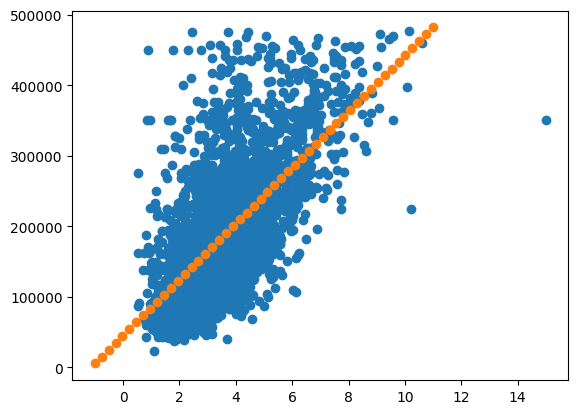

In [ ]:
#Primero gráficamos los datos sin procesar y luego el ajuste
plt.scatter(X2,y2)
plt.scatter(x2fit,y2fit)
plt.show()

#Yo le enseñe con los puntos azules y los valide con los naranjas

Aqui podemos ver que el modelo logró validar bien los datos, a pesar de que los datos si bien ya no están tan dispersos como en el modelo anterior, siguen estando muy repartidos.